Total observations: 474
Estimated p (MLE): 0.1595959595959596
Chi-square statistic: 43.8356798847119
Degrees of freedom: 33
p-value: 0.09838973756822622


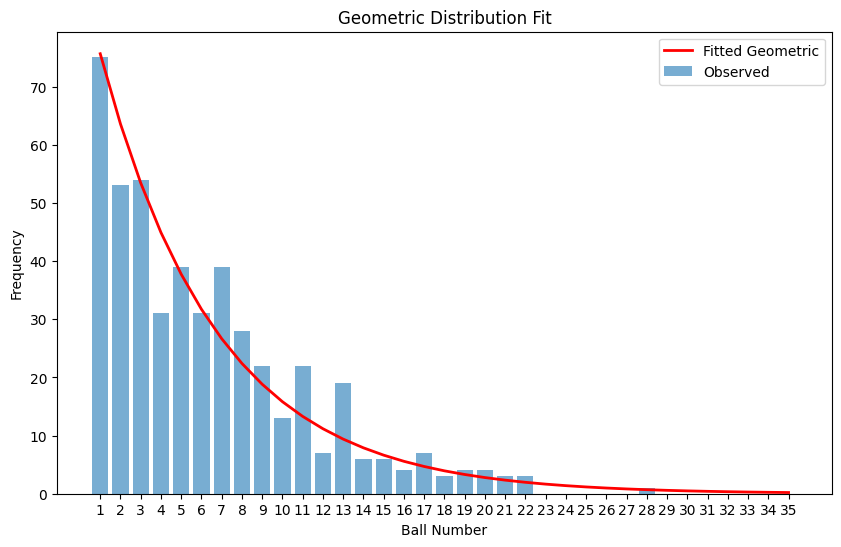

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1. Create Data
# -------------------------------------------------

df = pd.DataFrame(
    {
        "ball": list(range(1, 36)),
        "count": [
            75,
            53,
            54,
            31,
            39,
            31,
            39,
            28,
            22,
            13,
            22,
            7,
            19,
            6,
            6,
            4,
            7,
            3,
            4,
            4,
            3,
            3,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
        ],
    }
)

# -------------------------------------------------
# 2. Expand Frequency Data into Raw Sample
# -------------------------------------------------

data = np.repeat(df["ball"].values, df["count"].values)

n = len(data)
print("Total observations:", n)

# -------------------------------------------------
# 3. MLE Estimation of Geometric Parameter
# -------------------------------------------------
# For geometric distribution (support = 1,2,3,...):
# p_hat = 1 / mean

mean_x = np.mean(data)
p_hat = 1 / mean_x

print("Estimated p (MLE):", p_hat)

# -------------------------------------------------
# 4. Compute Expected Frequencies
# -------------------------------------------------

x_vals = df["ball"].values
observed = df["count"].values

expected_probs = stats.geom.pmf(x_vals, p_hat)
expected = expected_probs * n

# -------------------------------------------------
# 5. Chi-Square Goodness-of-Fit Test
# -------------------------------------------------

# Avoid division by zero
mask = expected > 0
chi2_stat = np.sum((observed[mask] - expected[mask]) ** 2 / expected[mask])

# Degrees of freedom:
# (#categories - 1 - #estimated_parameters)
df_chi2 = np.sum(mask) - 1 - 1

p_value = 1 - stats.chi2.cdf(chi2_stat, df_chi2)

print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", df_chi2)
print("p-value:", p_value)

# -------------------------------------------------
# 6. Plot Observed vs Fitted
# -------------------------------------------------

plt.figure(figsize=(10, 6))
plt.bar(x_vals, observed, alpha=0.6, label="Observed")
plt.plot(x_vals, expected, "r-", lw=2, label="Fitted Geometric")

plt.xlabel("Ball Number")
plt.ylabel("Frequency")
plt.title("Geometric Distribution Fit")

# Force integer ticks
plt.xticks(x_vals)

plt.legend()
plt.show()

In [3]:
expected

array([75.64848485, 63.57529232, 53.42893253, 44.90189078, 37.73573043,
       31.71326032, 26.65195211, 22.39840824, 18.82371278, 15.81952428,
       13.29479212, 11.17299701,  9.38983183,  7.89125261,  6.63184058,
        5.57342562,  4.68392941,  3.9363932 ,  3.30816075,  2.78019166,
        2.3364843 ,  1.96359085,  1.65020968,  1.38684289,  1.16550836,
        0.97949794,  0.82317403,  0.69179878,  0.58139049,  0.48860291,
        0.41062386,  0.34508995,  0.29001499,  0.24372977,  0.20483148])